In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#externo = pd.read_csv('./externo.csv')
interno = pd.read_csv('./interno.csv')

NameError: name 'pd' is not defined

In [4]:

interno['SEMENTE'] = interno['SEMENTE'].str.replace(".jpg", "")

NameError: name 'interno' is not defined

In [5]:
#externo['SEMENTE'] = externo['SEMENTE'].str.replace(".jpg", "")

In [5]:
interno['SEMENTE'] = interno['SEMENTE'].astype(int)
#externo['SEMENTE'] = externo['SEMENTE'].astype(int)

In [6]:
dados = pd.read_csv('./dados.csv')

In [7]:
dados.rename(columns={"REPETIÇÃO":"REPETICAO"}, inplace=True)

In [8]:
interno

,LOTE,REPETICAO,SEMENTE,0,1,2,3,4,5,6,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,6,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,6,2,23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,6,2,37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231373,0.231373,0.341176
3,6,2,36,0.325490,0.345098,0.447059,0.282353,0.258824,0.345098,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,6,2,22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,2,48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
446,1,2,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
447,1,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
448,1,2,2,0.364706,0.345098,0.388235,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [9]:
df_test = dados.merge(interno, how="right")

<AxesSubplot:>

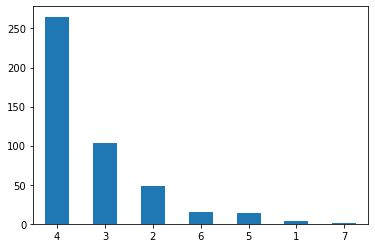

In [10]:
df_test['CLASSE'].value_counts().plot.bar(rot=0)

In [11]:
df_test.replace({"CLASSE":[6, 7]}, 5, inplace=True)

<AxesSubplot:>

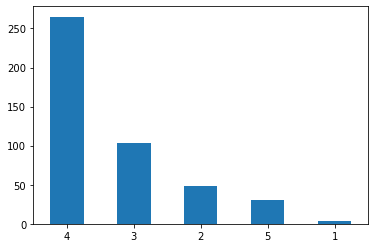

In [12]:
df_test['CLASSE'].value_counts().plot.bar(rot=0)

<AxesSubplot:>

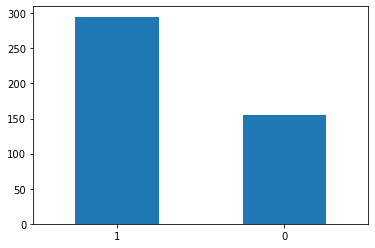

In [13]:
df_test['VIGOR'].value_counts().plot.bar(rot=0)

In [14]:
df_test.drop(['LOTE', 'REPETICAO', 'SEMENTE'], inplace=True, axis=1)

In [15]:
df_test.dropna(inplace=True)

In [16]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [17]:
classe = df_test['CLASSE']

In [18]:
vigor = df_test['VIGOR']

In [19]:
df_test.drop(['CLASSE', 'VIGOR'], inplace=True, axis=1)

In [20]:
df_test.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            440, 441, 442, 443, 444, 445, 446, 447, 448, 449],
           dtype='int64', length=450)

<h3>CNN</h3>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL


In [1]:
import tensorflow as tf

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_test, vigor, test_size=0.33)

In [ ]:
num_classes = 5


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_test, vigor, test_size=0.33)
X_train.shape

(301, 49152)

In [31]:
type(y_train)

pandas.core.series.Series

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [21]:
clf.score(X_test, y_test)

0.5570469798657718

In [22]:
from classificadores import *

In [ ]:
gradienteBooClassificator(df_test, classe, 5)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

In [ ]:
pred=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.51      0.22      0.31       104
           1       0.68      0.89      0.77       193

    accuracy                           0.65       297
   macro avg       0.59      0.55      0.54       297
weighted avg       0.62      0.65      0.61       297



In [23]:
svmclassificator(df_test, classe, 5)

--Classificator--
The classificator is: SVM
0.6127 accuracy with a standard deviation of 0.0078
0.1074 precision with a standard deviation of 0.0136
0.1752 recall with a standard deviation of 0.0220
0.1332 F1 with a standard deviation of 0.0168
-----------------------------------------------------------
SVM, Hold out, Acc =  0.5333333333333333
-----------------------------------------------------------


In [24]:
naivesBayesClassificator(df_test, classe, 10)

--Classificator--
The classificator is: GNB
0.3844 accuracy with a standard deviation of 0.0900
0.1782 precision with a standard deviation of 0.0611
0.1738 recall with a standard deviation of 0.0421
0.1553 F1 with a standard deviation of 0.0396
-----------------------------------------------------------
Gaussian Naive Bayes, Hold out, Acc =  0.6311111111111111
-----------------------------------------------------------


In [25]:
ramdomForestClassificator(df_test, vigor, 10)

--Classificator--
The classificator is: RF
0.6156 accuracy with a standard deviation of 0.0826
0.4745 precision with a standard deviation of 0.2015
0.4931 recall with a standard deviation of 0.0521
0.4269 F1 with a standard deviation of 0.0579
-----------------------------------------------------------
Random Forest, Hold out, Acc =  0.6518518518518519
-----------------------------------------------------------


In [ ]:
mlpclassificator(df_test, classe, 5)

--Classificator--
The classificator is: MLP
0.2889 accuracy with a standard deviation of 0.2589
0.0521 precision with a standard deviation of 0.0482
0.1733 recall with a standard deviation of 0.0133
0.0691 F1 with a standard deviation of 0.0590
-----------------------------------------------------------
Saída da rede:	 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Saída desejada:	 445    4
360    4
159    3
90     4
47     4
      ..
124    2
174    6
361    4
14     4
354    4
Name: CLASSE, Length: 180, dtype: int64
-----------------------------------------------------------
Score:  0.2222222222222222
MLP, hold out:  0.2222222222222222


In [ ]:
rf=RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [ ]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.12      0.19       104
           1       0.66      0.94      0.78       193

    accuracy                           0.65       297
   macro avg       0.59      0.53      0.48       297
weighted avg       0.61      0.65      0.57       297

Confusion Report
[[ 12  92]
 [ 11 182]]


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy'],
#   verbose=5,
    task_type="GPU"
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

/home/luan/.local/lib/python3.10/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU


: 

: 

In [ ]:
pred=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.13      0.21       100
           1       0.68      0.94      0.79       197

    accuracy                           0.67       297
   macro avg       0.60      0.53      0.50       297
weighted avg       0.63      0.67      0.59       297

Confusion Report
[[ 13  87]
 [ 12 185]]


In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pred)

0.6531986531986532

In [ ]:
df_externo = dados.merge(externo, how="right")

In [ ]:
df_externo

,LOTE,REPETICAO,SEMENTE,CLASSE,VIGOR,0,1,2,3,4,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,3,1,6,4,1,0.305882,0.258824,0.294118,0.321569,0.258824,...,0.329412,0.345098,0.294118,0.341176,0.352941,0.298039,0.360784,0.349020,0.301961,0.333333
1,3,1,27,5,1,0.364706,0.313725,0.349020,0.313725,0.254902,...,0.388235,0.392157,0.333333,0.400000,0.356863,0.290196,0.368627,0.360784,0.290196,0.384314
2,3,1,41,3,0,0.356863,0.313725,0.427451,0.352941,0.313725,...,0.529412,0.301961,0.247059,0.372549,0.337255,0.270588,0.337255,0.317647,0.250980,0.309804
3,3,1,35,4,1,0.313725,0.266667,0.572549,0.290196,0.250980,...,0.329412,0.313725,0.266667,0.345098,0.313725,0.286275,0.372549,0.262745,0.258824,0.368627
4,3,1,38,3,0,0.349020,0.294118,0.301961,0.317647,0.278431,...,0.349020,0.345098,0.301961,0.368627,0.333333,0.294118,0.356863,0.333333,0.294118,0.356863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,8,1,50,3,0,0.258824,0.223529,0.301961,0.274510,0.239216,...,0.572549,0.274510,0.258824,0.592157,0.294118,0.274510,0.635294,0.258824,0.239216,0.607843
396,8,1,19,4,1,0.301961,0.266667,0.345098,0.341176,0.309804,...,0.525490,0.247059,0.227451,0.498039,0.298039,0.278431,0.560784,0.282353,0.254902,0.568627
397,8,1,5,4,1,0.282353,0.282353,0.650980,0.294118,0.278431,...,0.635294,0.262745,0.258824,0.654902,0.254902,0.254902,0.650980,0.203922,0.211765,0.607843
398,8,1,46,4,1,0.258824,0.250980,0.639216,0.239216,0.227451,...,0.349020,0.364706,0.298039,0.349020,0.278431,0.227451,0.278431,0.305882,0.258824,0.427451


<AxesSubplot: >

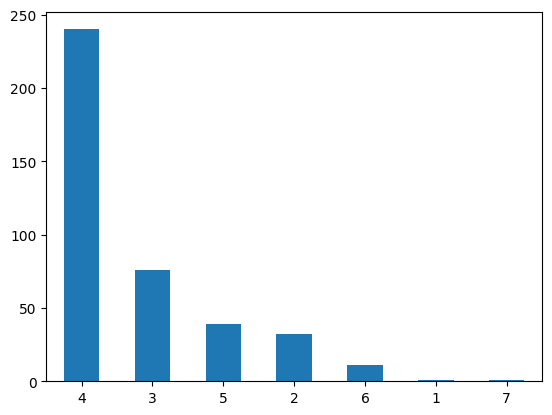

In [ ]:
df_externo['CLASSE'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

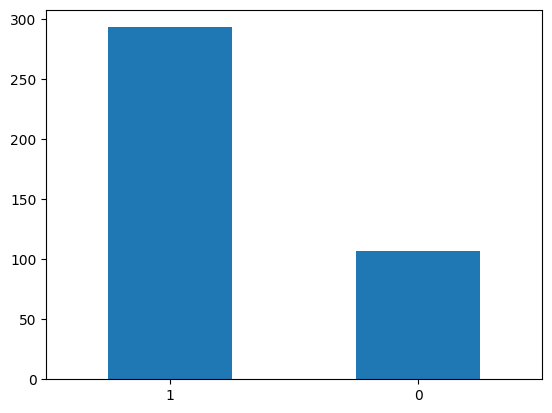

In [ ]:
df_externo['VIGOR'].value_counts().plot.bar(rot=0)